In [4]:
import tensorflow

data = tensorflow.keras.utils.image_dataset_from_directory("cats_vs_dogs", shuffle=False, batch_size=None)
data

Found 2000 files belonging to 1 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [5]:
!pip install matplotlib

     ---------------------------------------- 0.0/160.4 kB ? eta -:--:--
     ------------------------------------ - 153.6/160.4 kB 9.0 MB/s eta 0:00:01
     -------------------------------------- 160.4/160.4 kB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.6 MB 32.7 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/7.6 MB 36.0 MB/s eta 0:00:01
   ------------------------ --------------- 4.7/7.6 MB 43.0 MB/s eta 0:00:01
   ---------------------------------- ----- 6.5/7.6 MB 41.7 MB/s eta 0:00:01
   ---------------------------------------  7.6/7.6 MB 44.4 MB/s eta 0:00:01
   ---------------------------------------- 7.6/7.6 MB 37.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/186.7 kB ? eta -:--:--
   --------------------------------------- 186.7/186.7 kB 11.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------

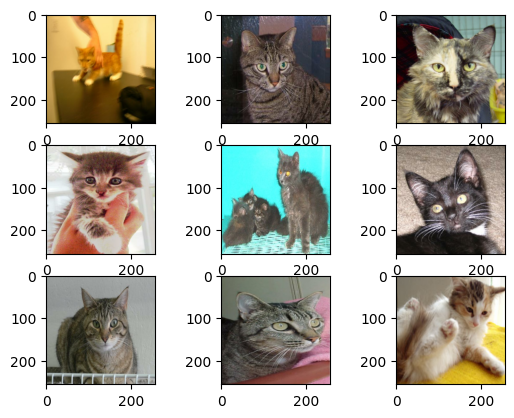

In [6]:
import matplotlib.pyplot as plt

images = data.take(9)

plt.figure() # Create a canvas
for i, (image, label) in enumerate(images):
    plt.subplot(3, 3, i + 1) # Plotting the i+1 image in a 3x3 canvas
    plt.imshow(image.numpy().astype("uint8"))

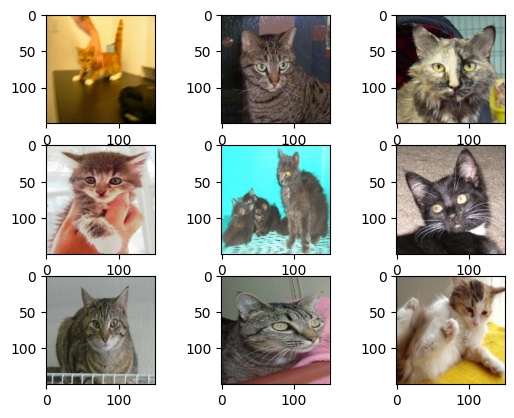

In [8]:
images = data.take(9)

resize = tensorflow.keras.layers.Resizing(150, 150)
images = images.map(lambda x, y: (resize(x), y))

plt.figure() # Create a canvas
for i, (image, label) in enumerate(images):
    plt.subplot(3, 3, i + 1) # Plotting the i+1 image in a 3x3 canvas
    plt.imshow(image.numpy().astype("uint8"))

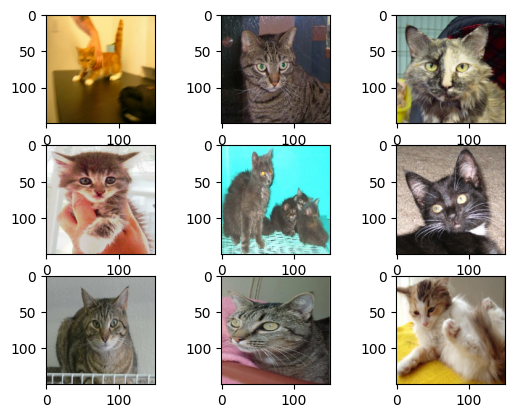

In [9]:
images = data.take(9)

resize = tensorflow.keras.layers.Resizing(150, 150)
images = images.map(lambda x, y: (resize(x), y))

flip = tensorflow.keras.layers.RandomFlip("horizontal")
images = images.map(lambda x, y: (flip(x), y))

plt.figure() # Create a canvas
for i, (image, label) in enumerate(images):
    plt.subplot(3, 3, i + 1) # Plotting the i+1 image in a 3x3 canvas
    plt.imshow(image.numpy().astype("uint8"))

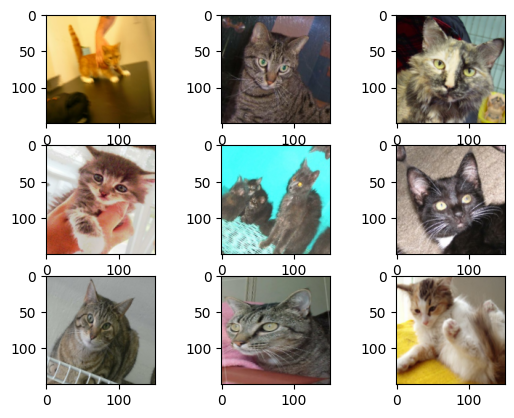

In [10]:
images = data.take(9)

resize = tensorflow.keras.layers.Resizing(150, 150)
images = images.map(lambda x, y: (resize(x), y))

flip = tensorflow.keras.layers.RandomFlip("horizontal")
images = images.map(lambda x, y: (flip(x), y))

rotate = tensorflow.keras.layers.RandomRotation(0.1)
images = images.map(lambda x, y: (rotate(x), y))

plt.figure() # Create a canvas
for i, (image, label) in enumerate(images):
    plt.subplot(3, 3, i + 1) # Plotting the i+1 image in a 3x3 canvas
    plt.imshow(image.numpy().astype("uint8"))

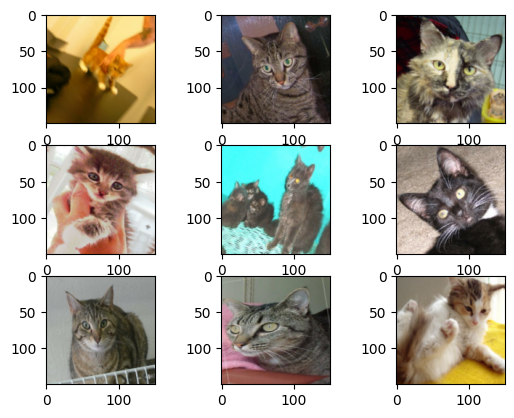

In [11]:
augmentation_layers = [
    tensorflow.keras.layers.Resizing(150, 150),
    tensorflow.keras.layers.RandomFlip("horizontal"),
    tensorflow.keras.layers.RandomRotation(0.1),
]

def augment(x):
    for layer in augmentation_layers:
        x = layer(x)
    return x

images = data.take(9)
images = images.map(lambda x, y: (augment(x), y))

plt.figure() # Create a canvas
for i, (image, label) in enumerate(images):
    plt.subplot(3, 3, i + 1) # Plotting the i+1 image in a 3x3 canvas
    plt.imshow(image.numpy().astype("uint8")) # Convert from float to int